In [2]:
import pandas as pd

df = pd.read_csv('data.csv')

In [8]:
df.drop("Unnamed: 0", inplace = True, axis = 1)

In [9]:
df.columns = ['Date', 'sfu']

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
train_data = df[(df['Date'].dt.year < 2003) & (df['Date'].dt.year > 1979)]
test_data = df[(df['Date'].dt.year >= 2003) & (df['Date'].dt.year <= 2014)]


In [ ]:
test_data['sfu']

17853    75.000000
17854    74.000000
17855    80.000000
17856    85.000000
17857    84.000000
           ...    
26981    85.983333
26982    84.433333
26983    83.583333
26984    82.733333
26985    82.733333
Name: sfu, Length: 9133, dtype: float64

In [16]:
import numpy as np
sequence = df['sfu']

def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

# define input sequence
raw_seq = df['sfu']
# choose a number of time steps
n_steps = 27
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
# for i in range(len(X)):
# 	print(X[i], y[i])

In [ ]:
train_X, train_y = split_sequence(train_data['sfu'], 27)
# print("train split done")
test_X, test_y = split_sequence(np.array(test_data['sfu']), 27)

train split done


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))

# Compile model with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Define checkpoint callback
checkpoint = ModelCheckpoint('model_weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

# Fit model with checkpointing
history = model.fit(X, y, epochs=50, verbose=1, validation_data = (test_X, test_y), callbacks=[checkpoint])

Epoch 1/50


c:\Users\Swaroop\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


843/843 [==============================] - 9s 9ms/step - loss: 2271.0439 - val_loss: 77.3587
Epoch 2/50
843/843 [==============================] - 8s 10ms/step - loss: 73.2947 - val_loss: 77.7835
Epoch 3/50
843/843 [==============================] - 8s 9ms/step - loss: 54.1536 - val_loss: 73.2354
Epoch 4/50
843/843 [==============================] - 8s 9ms/step - loss: 61.9835 - val_loss: 102.6007
Epoch 5/50
843/843 [==============================] - 8s 9ms/step - loss: 65.0210 - val_loss: 69.5172
Epoch 6/50
843/843 [==============================] - 8s 9ms/step - loss: 45.1437 - val_loss: 61.5994
Epoch 7/50
843/843 [==============================] - 8s 9ms/step - loss: 43.1301 - val_loss: 63.6944
Epoch 8/50
843/843 [==============================] - 8s 9ms/step - loss: 2223.1702 - val_loss: 143.0979
Epoch 9/50
843/843 [==============================] - 8s 9ms/step - loss: 127.6066 - val_loss: 119.1137
Epoch 10/50
843/843 [==============================] - 8s 9ms/step - loss: 108.6807 

<AxesSubplot: >

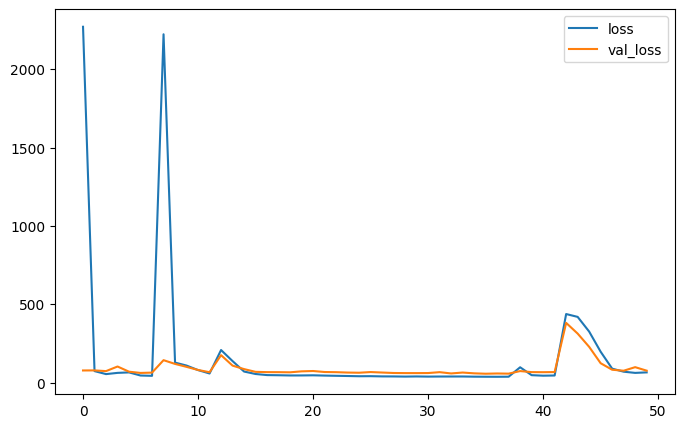

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))


In [ ]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))
pred_y = model.predict(test_X)

285/285 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have your true values in 'y_true' and predicted values in 'y_pred'
r2 = r2_score(test_y, pred_y)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))


print("R2 score:", r2)
print("RMSE: ", rmse)

R2 score: 0.9595012633448489
RMSE:  8.725368086273086


In [ ]:
model.save('singlelayerLSTM.h5')

LSTM with 64 units

In [18]:
train_X, train_y = split_sequence(np.array(train_data['sfu']), 27)
# print("train split done")
test_X, test_y = split_sequence(np.array(test_data['sfu']), 27)

In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

# Define model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))

# Compile model with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Define checkpoint callback
checkpoint = ModelCheckpoint('singleLSTM64.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

# Fit model with checkpointing
history = model.fit(train_X, train_y, epochs=50, verbose=1, validation_data = (test_X, test_y), callbacks=[checkpoint])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


262/262 [==============================] - 6s 18ms/step - loss: 2412.2122 - val_loss: 216.1240
Epoch 2/50
262/262 [==============================] - 5s 20ms/step - loss: 689.1141 - val_loss: 348.1982
Epoch 3/50
262/262 [==============================] - 4s 15ms/step - loss: 694.2921 - val_loss: 152.2729
Epoch 4/50
262/262 [==============================] - 4s 16ms/step - loss: 369.3511 - val_loss: 88.7387
Epoch 5/50
262/262 [==============================] - 5s 18ms/step - loss: 266.5711 - val_loss: 101.5090
Epoch 6/50
262/262 [==============================] - 4s 16ms/step - loss: 209.9076 - val_loss: 84.2837
Epoch 7/50
262/262 [==============================] - 4s 16ms/step - loss: 139.5942 - val_loss: 19.7829
Epoch 8/50
262/262 [==============================] - 5s 18ms/step - loss: 36.0813 - val_loss: 18.8630
Epoch 9/50
262/262 [==============================] - 4s 17ms/step - loss: 32.1948 - val_loss: 17.2650
Epoch 10/50
262/262 [==============================] - 5s 19ms/step - lo

<Axes: >

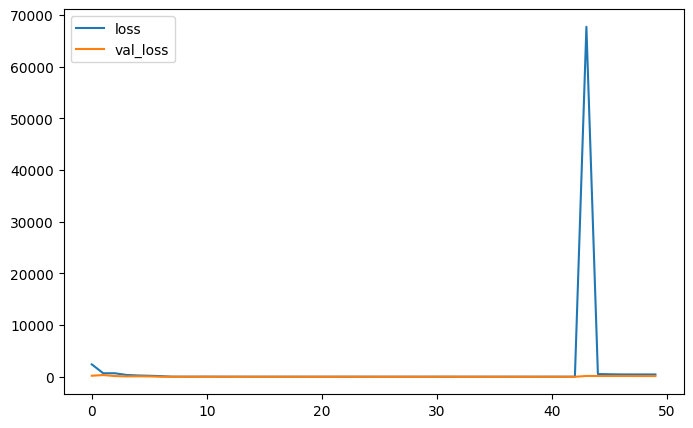

In [20]:
pd.DataFrame(history.history).plot(figsize=(8,5))


In [21]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))
pred_y = model.predict(test_X)

137/137 [==============================] - 1s 5ms/step


In [22]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have your true values in 'y_true' and predicted values in 'y_pred'
r2 = r2_score(test_y, pred_y)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))


print("R2 score:", r2)
print("RMSE: ", rmse)

R2 score: 0.8242619783721887
RMSE:  12.25504707363281


2 layer LSTM with 64 32 units

In [23]:
train_X, train_y = split_sequence(np.array(train_data['sfu']), 27)
# print("train split done")
test_X, test_y = split_sequence(np.array(test_data['sfu']), 27)

In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

# Define model
model = Sequential()
model.add(LSTM(64, activation='relu',return_sequences= True,  input_shape=(n_steps, n_features)))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))

# Compile model with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Define checkpoint callback
checkpoint = ModelCheckpoint('2LayerLSTM6432.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

# Fit model with checkpointing
history = model.fit(train_X, train_y, epochs=50, verbose=1, validation_data = (test_X, test_y), callbacks=[checkpoint])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


262/262 [==============================] - 12s 37ms/step - loss: 23438.5762 - val_loss: 1880.4197
Epoch 2/50
262/262 [==============================] - 8s 30ms/step - loss: 1749.2867 - val_loss: 764.0178
Epoch 3/50
262/262 [==============================] - 9s 34ms/step - loss: 3812.3684 - val_loss: 4409.3755
Epoch 4/50
262/262 [==============================] - 9s 36ms/step - loss: 4497.8354 - val_loss: 198.8675
Epoch 5/50
262/262 [==============================] - 8s 32ms/step - loss: 577.6239 - val_loss: 191.0145
Epoch 6/50
262/262 [==============================] - 9s 34ms/step - loss: 575.5513 - val_loss: 190.0741
Epoch 7/50
262/262 [==============================] - 9s 34ms/step - loss: 575.9380 - val_loss: 190.0153
Epoch 8/50
262/262 [==============================] - 9s 34ms/step - loss: 571.7750 - val_loss: 190.8104
Epoch 9/50
262/262 [==============================] - 9s 33ms/step - loss: 13828936.0000 - val_loss: 234.2140
Epoch 10/50
262/262 [==============================] 

<Axes: >

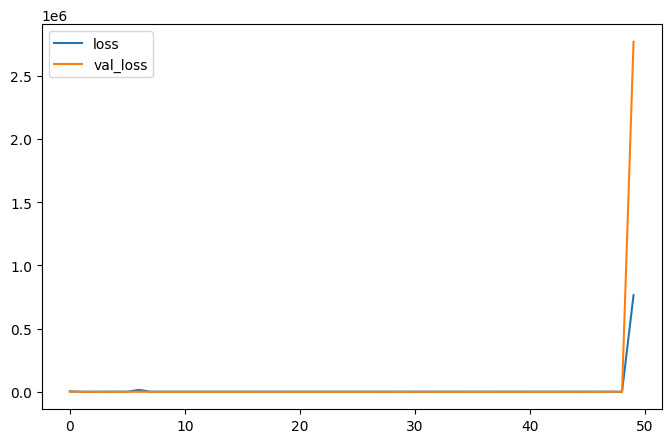

In [28]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have your true values in 'y_true' and predicted values in 'y_pred'
r2 = r2_score(test_y, pred_y)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))


print("R2 score:", r2)
print("RMSE: ", rmse)

R2 score: 0.8242619783721887
RMSE:  12.25504707363281


2 LAYERED LSTM WITH BOTH RETURN_SEQ = True

In [26]:
train_X, train_y = split_sequence(np.array(train_data['sfu']), 27)
# print("train split done")
test_X, test_y = split_sequence(np.array(test_data['sfu']), 27)

In [27]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

# Define model
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences= True,  input_shape=(n_steps, n_features)))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))

# Compile model with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Define checkpoint callback
checkpoint = ModelCheckpoint('2LayerLSTM6432_v2.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

# Fit model with checkpointing
history = model.fit(train_X, train_y, epochs=50, verbose=1, validation_data = (test_X, test_y), callbacks=[checkpoint])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


262/262 [==============================] - 11s 30ms/step - loss: 3164.6543 - val_loss: 584.1986
Epoch 2/50
262/262 [==============================] - 9s 35ms/step - loss: 434.2335 - val_loss: 101.9779
Epoch 3/50
262/262 [==============================] - 9s 34ms/step - loss: 327.8537 - val_loss: 175.3507
Epoch 4/50
262/262 [==============================] - 8s 29ms/step - loss: 482.9690 - val_loss: 353.0375
Epoch 5/50
262/262 [==============================] - 9s 36ms/step - loss: 795.4651 - val_loss: 204.4794
Epoch 6/50
262/262 [==============================] - 10s 38ms/step - loss: 639.0782 - val_loss: 199.5379
Epoch 7/50
262/262 [==============================] - 12s 45ms/step - loss: 15002.2129 - val_loss: 266.7909
Epoch 8/50
262/262 [==============================] - 9s 34ms/step - loss: 736.7410 - val_loss: 242.8341
Epoch 9/50
262/262 [==============================] - 9s 36ms/step - loss: 697.5519 - val_loss: 238.1114
Epoch 10/50
262/262 [==============================] - 9s 34

In [ ]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))
pred_y = model.predict(test_X)

285/285 [==============================] - 2s 6ms/step


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have your true values in 'y_true' and predicted values in 'y_pred'
r2 = r2_score(test_y, pred_y)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))


print("R2 score:", r2)
print("RMSE: ", rmse)

ValueError: Found array with dim 3. None expected <= 2.

3 Layered LSTM

In [ ]:
train_X, train_y = split_sequence(train_data['sfu'], 27)
# print("train split done")
test_X, test_y = split_sequence(np.array(test_data['sfu']), 27)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

# Define model
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences= True,  input_shape=(n_steps, n_features)))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(16, activation='relu'))
model.add(Dense(1))

# Compile model with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Define checkpoint callback
checkpoint = ModelCheckpoint('3LayerLSTM643216.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

# Fit model with checkpointing
history = model.fit(train_X, train_y, epochs=50, verbose=1, validation_data = (test_X, test_y), callbacks=[checkpoint])

Epoch 1/50


c:\Users\Swaroop\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


558/558 [==============================] - 20s 29ms/step - loss: 5037.4058 - val_loss: 681.5106
Epoch 2/50
558/558 [==============================] - 15s 27ms/step - loss: 1514.5847 - val_loss: 682.6987
Epoch 3/50
558/558 [==============================] - 14s 26ms/step - loss: 936.0818 - val_loss: 468.7449
Epoch 4/50
558/558 [==============================] - 14s 26ms/step - loss: 626.7081 - val_loss: 387.4768
Epoch 5/50
558/558 [==============================] - 14s 26ms/step - loss: 383.7231 - val_loss: 317.8738
Epoch 6/50
558/558 [==============================] - 14s 26ms/step - loss: 386.9725 - val_loss: 274.4425
Epoch 7/50
558/558 [==============================] - 15s 26ms/step - loss: 285.8145 - val_loss: 242.0559
Epoch 8/50
558/558 [==============================] - 14s 26ms/step - loss: 240.5510 - val_loss: 210.7982
Epoch 9/50
558/558 [==============================] - 14s 26ms/step - loss: 245.4944 - val_loss: 193.7261
Epoch 10/50
558/558 [==============================] - 

<AxesSubplot: >

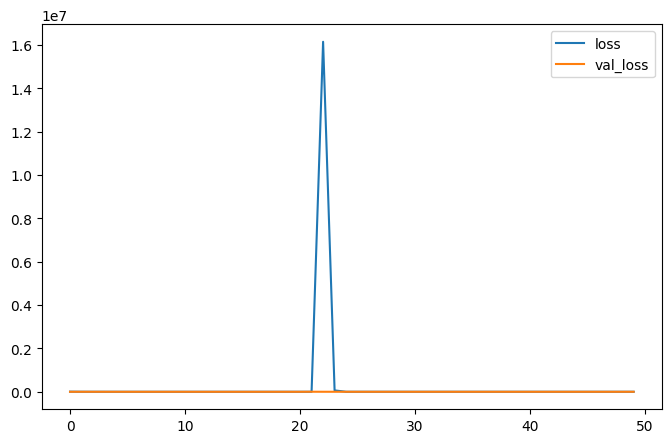

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [ ]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))
pred_y = model.predict(test_X)

285/285 [==============================] - 3s 8ms/step


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have your true values in 'y_true' and predicted values in 'y_pred'
r2 = r2_score(test_y, pred_y)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))


print("R2 score:", r2)
print("RMSE: ", rmse)

R2 score: 0.7189686860114571
RMSE:  22.98478131989393


CNN LSTM MODEL

In [29]:
train_X, train_y = split_sequence(np.array(train_data['sfu']), 27)
# print("train split done")
test_X, test_y = split_sequence(np.array(test_data['sfu']), 27)

In [30]:
subsequences = 1
timesteps = train_X.shape[1]//subsequences
train_X = train_X.reshape((train_X.shape[0], subsequences, timesteps, 1))
test_X = test_X.reshape((test_X.shape[0], subsequences, timesteps, 1))
print('Train set shape', train_X.shape)

Train set shape (8374, 1, 27, 1)


In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, MaxPooling1D, Flatten, Conv1D, TimeDistributed
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')

optimizer = Adam(lr=0.001)
model_cnn_lstm.compile(optimizer=optimizer, loss='mse')
# Define checkpoint callback
checkpoint = ModelCheckpoint('CNNLSTM50.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

history = model_cnn_lstm.fit(train_X, train_y, epochs=50, verbose=1, validation_data = (test_X, test_y), callbacks=[checkpoint])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


262/262 [==============================] - 6s 16ms/step - loss: 573.9578 - val_loss: 78.2330
Epoch 2/50
262/262 [==============================] - 2s 8ms/step - loss: 181.1203 - val_loss: 63.2897
Epoch 3/50
262/262 [==============================] - 2s 6ms/step - loss: 149.7801 - val_loss: 50.7903
Epoch 4/50
262/262 [==============================] - 2s 6ms/step - loss: 133.4840 - val_loss: 51.9627
Epoch 5/50
262/262 [==============================] - 2s 6ms/step - loss: 125.3991 - val_loss: 48.4935
Epoch 6/50
262/262 [==============================] - 2s 6ms/step - loss: 129.1703 - val_loss: 48.3791
Epoch 7/50
262/262 [==============================] - 2s 7ms/step - loss: 117.2957 - val_loss: 43.9048
Epoch 8/50
262/262 [==============================] - 3s 11ms/step - loss: 111.8717 - val_loss: 45.0006
Epoch 9/50
262/262 [==============================] - 2s 7ms/step - loss: 112.4122 - val_loss: 49.1554
Epoch 10/50
262/262 [==============================] - 2s 7ms/step - loss: 103.675

In [ ]:
test_X = test_X.reshape((test_X.shape[0], subsequences, timesteps, 1))

In [ ]:
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features)) this is already done above
pred_y = model_cnn_lstm.predict(test_X)

285/285 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have your true values in 'y_true' and predicted values in 'y_pred'
r2 = r2_score(test_y, pred_y)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))


print("R2 score:", r2)
print("RMSE: ", rmse)

R2 score: 0.8876662352494111
RMSE:  14.531758647404613


2 cnn lstm

In [32]:
train_X, train_y = split_sequence(np.array(train_data['sfu']), 27)
# print("train split done")
test_X, test_y = split_sequence(np.array(test_data['sfu']), 27)

In [38]:
subsequences = 1
timesteps = train_X.shape[1]//subsequences
train_X = train_X.reshape((train_X.shape[0], subsequences, timesteps, 1))
test_X = test_X.reshape((test_X.shape[0], subsequences, timesteps, 1))
print('Train set shape', train_X.shape)

Train set shape (8374, 1, 27, 1)


In [34]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, MaxPooling1D, Flatten, Conv1D, TimeDistributed
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=4,  activation='relu'), input_shape=(None, n_steps, n_features)))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=32, kernel_size=4, activation='relu')))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')

optimizer = Adam(lr=0.001)
model_cnn_lstm.compile(optimizer=optimizer, loss='mse')
# Define checkpoint callback
checkpoint = ModelCheckpoint('CNNLSTM50.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

history = model_cnn_lstm.fit(train_X, train_y, epochs=50, verbose=1, validation_data = (test_X, test_y), callbacks=[checkpoint])

Epoch 1/50
262/262 [==============================] - 4s 7ms/step - loss: 1356.5890 - val_loss: 215.7271
Epoch 2/50
262/262 [==============================] - 2s 8ms/step - loss: 506.2127 - val_loss: 152.5275
Epoch 3/50
262/262 [==============================] - 2s 9ms/step - loss: 369.1234 - val_loss: 121.4819
Epoch 4/50
262/262 [==============================] - 2s 6ms/step - loss: 309.1150 - val_loss: 99.5835
Epoch 5/50
262/262 [==============================] - 2s 6ms/step - loss: 280.5562 - val_loss: 102.0936
Epoch 6/50
262/262 [==============================] - 2s 6ms/step - loss: 246.5271 - val_loss: 83.2405
Epoch 7/50
262/262 [==============================] - 2s 6ms/step - loss: 238.2622 - val_loss: 105.2818
Epoch 8/50
262/262 [==============================] - 2s 6ms/step - loss: 227.0250 - val_loss: 82.1190
Epoch 9/50
262/262 [==============================] - 2s 7ms/step - loss: 206.1525 - val_loss: 98.2877
Epoch 10/50
262/262 [==============================] - 2s 9ms/step 

In [ ]:
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features)) this is already done above
pred_y = model_cnn_lstm.predict(test_X)

285/285 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have your true values in 'y_true' and predicted values in 'y_pred'
r2 = r2_score(test_y, pred_y)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))


print("R2 score:", r2)
print("RMSE: ", rmse)

R2 score: 0.8653090218222668
RMSE:  15.912274885888893


2CNN2LSTM model

In [57]:
train_X, train_y = split_sequence(np.array(train_data['sfu']), 27)
# print("train split done")
test_X, test_y = split_sequence(np.array(test_data['sfu']), 27)

In [39]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, MaxPooling1D, Flatten, Conv1D, TimeDistributed
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=16, kernel_size=14,  activation='relu'), input_shape=(None, n_steps, n_features)))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=32, kernel_size=4, activation='relu')))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(64, activation='relu', return_sequences= True))
model_cnn_lstm.add(LSTM(32, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')

optimizer = Adam(lr=0.001)
model_cnn_lstm.compile(optimizer=optimizer, loss='mse')
# Define checkpoint callback
checkpoint = ModelCheckpoint('CNNLSTM6432.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

history = model_cnn_lstm.fit(train_X, train_y, epochs=50, verbose=1, validation_data = (test_X, test_y), callbacks=[checkpoint])

Epoch 1/50
262/262 [==============================] - 4s 7ms/step - loss: 2888.1428 - val_loss: 179.1198
Epoch 2/50
262/262 [==============================] - 2s 8ms/step - loss: 379.7635 - val_loss: 116.5778
Epoch 3/50
262/262 [==============================] - 2s 7ms/step - loss: 268.7534 - val_loss: 79.0509
Epoch 4/50
262/262 [==============================] - 2s 6ms/step - loss: 192.7103 - val_loss: 60.0361
Epoch 5/50
262/262 [==============================] - 1s 6ms/step - loss: 144.2923 - val_loss: 55.1457
Epoch 6/50
262/262 [==============================] - 1s 6ms/step - loss: 119.3502 - val_loss: 41.8880
Epoch 7/50
262/262 [==============================] - 1s 5ms/step - loss: 110.5948 - val_loss: 39.9192
Epoch 8/50
262/262 [==============================] - 1s 6ms/step - loss: 110.7840 - val_loss: 36.8893
Epoch 9/50
262/262 [==============================] - 1s 5ms/step - loss: 97.1861 - val_loss: 51.0472
Epoch 10/50
262/262 [==============================] - 2s 9ms/step - lo

In [40]:
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features)) this is already done above
pred_y = model_cnn_lstm.predict(test_X)

137/137 [==============================] - 1s 2ms/step


In [41]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have your true values in 'y_true' and predicted values in 'y_pred'
r2 = r2_score(test_y, pred_y)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))


print("R2 score:", r2)
print("RMSE: ", rmse)

R2 score: 0.96342966124135
RMSE:  5.590447957940266


In [42]:
train_X

array([[[[201.87142857],
         [210.48571429],
         [219.1       ],
         ...,
         [182.36666667],
         [187.55      ],
         [192.73333333]]],


       [[[210.48571429],
         [219.1       ],
         [216.95      ],
         ...,
         [187.55      ],
         [192.73333333],
         [197.91666667]]],


       [[[219.1       ],
         [216.95      ],
         [214.8       ],
         ...,
         [192.73333333],
         [197.91666667],
         [203.1       ]]],


       ...,


       [[[152.01578947],
         [152.04736842],
         [152.07894737],
         ...,
         [127.4       ],
         [116.5       ],
         [116.9       ]]],


       [[[152.04736842],
         [152.07894737],
         [152.11052632],
         ...,
         [116.5       ],
         [116.9       ],
         [114.8       ]]],


       [[[152.07894737],
         [152.11052632],
         [152.14210526],
         ...,
         [116.9       ],
         [114.8       ],
       

In [65]:
import numpy as np

# Prepare input for closed-loop prediction
initial_input = np.array(train_data['sfu'][-27:])  # Last 27-day period from the training data
num_steps = 30

# Initialize a list to store predictions
predictions = []

# Generate predictions iteratively
for _ in range(num_steps):
    # Reshape the input for prediction
    initial_input_reshaped =  initial_input.reshape((1, 27, 1))

    # Make a prediction using the LSTM model
    prediction = model_cnn_lstm.predict(initial_input_reshaped)

    # Store the prediction
    predictions.append(prediction[0][0])

    # Shift the input sequence one step forward by removing the first value
    initial_input = np.append(initial_input[1:], prediction)

# Print the predictions
print(predictions)


ValueError: ignored

In [61]:
train_X


array([[201.87142857, 210.48571429, 219.1       , ..., 182.36666667,
        187.55      , 192.73333333],
       [210.48571429, 219.1       , 216.95      , ..., 187.55      ,
        192.73333333, 197.91666667],
       [219.1       , 216.95      , 214.8       , ..., 192.73333333,
        197.91666667, 203.1       ],
       ...,
       [152.01578947, 152.04736842, 152.07894737, ..., 127.4       ,
        116.5       , 116.9       ],
       [152.04736842, 152.07894737, 152.11052632, ..., 116.5       ,
        116.9       , 114.8       ],
       [152.07894737, 152.11052632, 152.14210526, ..., 116.9       ,
        114.8       , 113.8       ]])

In [62]:
train_data

,Date,sfu
8127,1980-01-01,201.871429
8128,1980-01-02,210.485714
8129,1980-01-03,219.100000
8130,1980-01-04,216.950000
8131,1980-01-05,214.800000
...,...,...
16523,2002-12-27,116.500000
16524,2002-12-28,116.900000
16525,2002-12-29,114.800000
16526,2002-12-30,113.800000
